# GluonTS - Transfer Learning Approach (monthly) - 2/2

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_monthly`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_monthly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [1]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [1]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.1
1.4.1


In [2]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [4]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [5]:
dataname_a = "m4_monthly_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_atm.


48000

In [6]:
dataname_b1 = "m4_monthly_macro"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_macro.


10016

In [7]:
dataname_b2 = "m4_monthly_micro"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro.


10975

In [8]:
dataname_b3 = "m4_monthly_other"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_other.


277

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 48000
length test: 48000

start:
 1750-01-31 00:00:00
target:
 [8000. 8350. 8570. 7700. 7080. 6520. 6070. 6650. 6830. 5710.]
feat_static_cat:
 [1]


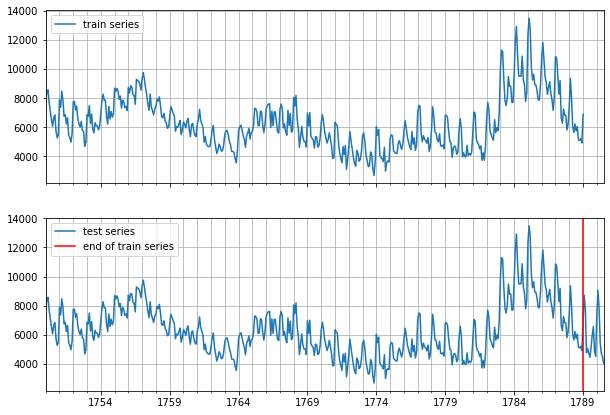

In [9]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 10016
length test: 10016

start:
 1750-01-31 00:00:00
target:
 [8000. 8350. 8570. 7700. 7080. 6520. 6070. 6650. 6830. 5710.]
feat_static_cat:
 [1]


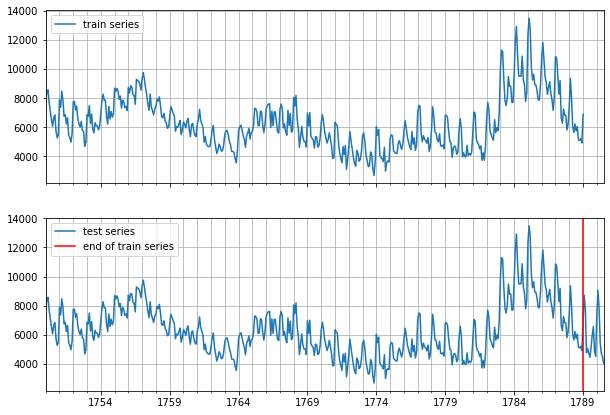

In [10]:
dataset_b = dataset_b1

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [11]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [12]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [13]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=<MetaData freq='M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='48000'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=18>, train=<gluonts.dataset.common.FileDataset object at 0x00000151A872D3C8>, test=<gluonts.dataset.common.FileDataset object at 0x00000151A875CC88>)

 TrainDatasets(metadata=<MetaData freq='M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='10016'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=18>, train=<gluonts.dataset.common.FileDataset object at 0x00000151A6CA1C88>, test=<gluonts.dataset.common.FileDataset object at 0x00000151A875CFD0>)


In [14]:
print(dataname_a)
print(dataname_b1)

m4_monthly_atm
m4_monthly_macro


In [15]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [17]:
print(dataname_a)
print(dataname_b1)

m4_monthly_atm
m4_monthly_macro


## Study 1: `m4_monthly` vs. `m4_monthly_macro` trained network

### Run I.: Training: A, Eval: B

- 10 trials training a network on dataset a and evaluating network on data a

### Run II.: Training: B, Eval: B

- 10 trials of training a network on dataset a and evaluating it on dataset b.

## Study 2: `m4_monthly_atm` vs. `m4_monthly_micro` trained network

### Run I.: Training: A, Eval: B

- 10 trials training a network on dataset a and evaluating network on data a

### Run II.: Training: B, Eval: B

- 10 trials of training a network on dataset a and evaluating it on dataset b.

In [ ]:
# results = pd.DataFrame()

# for i in range(42,45):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_monthly_micro", dataname_b="m4_monthly_micro", seed=i, epochs=400, num_batches=200)
#     pprint(df)
#     results = results.append(df)
    
# results

# Study 3: `m4_monthly_other`

## Run I - Training: A, Eval: B

In [ ]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_other", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

In [26]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_atm", dataname_b="m4_monthly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_other.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 200/200 [00:06<00:00, 30.09it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[0] Elapsed time 6.649 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.483444
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 32.10it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[1] Elapsed time 6.233 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.921336
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.66it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[2] Elapsed time 6.319 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.858160
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 33.71it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[3] Elapsed time 5.935 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.571998
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 32.48it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.87it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[37] Elapsed time 6.086 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.159834
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 30.81it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[38] Elapsed time 6.493 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.333124
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 31.35it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[39] Elapsed time 6.381 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.487005
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.99it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[40] Elapsed time 6.064 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.346072
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.19it/s, avg_epoch_loss=6.4

100%|██████████| 200/200 [00:06<00:00, 31.38it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[73] Elapsed time 6.374 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.893568
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 32.33it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[74] Elapsed time 6.187 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.869175
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 31.41it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 6.371 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.196542
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 30.58it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 6.542 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.981184
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 32.28it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[77] Elapsed time 6

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.97it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[110] Elapsed time 6.258 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.901143
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.22it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[111] Elapsed time 6.022 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.432632
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.47it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[112] Elapsed time 6.788 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.868206
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.89it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[113] Elapsed time 6.085 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.351470
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.86it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.068193
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.75it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[147] Elapsed time 6.109 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.397216
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.77it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[148] Elapsed time 6.105 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.323580
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.57it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[149] Elapsed time 6.543 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.961281
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.53it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[150] Elapsed time 6.344 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.948263
INFO:root:Epoch[151] Learning rate is 5e-05


INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.60it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[220] Elapsed time 6.330 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.749851
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.62it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[221] Elapsed time 6.132 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.886629
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.11it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[222] Elapsed time 6.042 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.350919
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.28it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[223] Elapsed time 6.013 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.186663
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.44it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.130038
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.19it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[257] Elapsed time 6.215 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.176908
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.62it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[258] Elapsed time 6.328 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.481010
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.43it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[259] Elapsed time 6.169 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.132996
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.37it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[260] Elapsed time 6.377 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.731937
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.46it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[330] Elapsed time 5.980 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.083796
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.87it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[331] Elapsed time 6.277 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.047881
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.11it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[332] Elapsed time 6.042 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.908338
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.43it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[333] Elapsed time 6.365 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.763075
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.89it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.687739
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.03it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[367] Elapsed time 6.245 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.774165
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.29it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[368] Elapsed time 6.393 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.460121
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.92it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[369] Elapsed time 6.078 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.060445
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.99it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[370] Elapsed time 5.886 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.978867
INFO:root:Epoch[371] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.029551  0.140559  14.434929            0.114292            0.065361   

   seed  epochs  num_batches      train data         eval data  
0    42     400          200  m4_monthly_atm  m4_monthly_other  
Next seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 200/200 [00:06<00:00, 29.52it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[0] Elapsed time 6.777 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.428457
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 30.42it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[1] Elapsed time 6.577 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.977335
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.88it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[2] Elapsed time 6.276 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.908158
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.10it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[3] Elapsed time 6.434 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.647369
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 32.88it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.96it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[37] Elapsed time 6.069 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.144715
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.54it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[38] Elapsed time 6.147 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.155343
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 31.95it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[39] Elapsed time 6.263 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.371182
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 34.19it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[40] Elapsed time 5.851 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.327992
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.12it/s, avg_epoch_loss=6.8

100%|██████████| 200/200 [00:06<00:00, 32.39it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[73] Elapsed time 6.176 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.811010
INFO:root:Loading parameters from best epoch (33)
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.45it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[74] Elapsed time 6.167 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.041131
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.79it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[75] Elapsed time 6.293 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.184011
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.14it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 6.225 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.977578
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.18it/s, avg_epoch_loss=6

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.98it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[110] Elapsed time 6.254 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=7.036116
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.61it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[111] Elapsed time 5.781 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.559381
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.60it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[112] Elapsed time 5.953 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.695647
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.98it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[113] Elapsed time 5.888 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.478031
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.76it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=7.067752
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.48it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[147] Elapsed time 6.563 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.392796
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.06it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[148] Elapsed time 6.052 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.443574
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.91it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[149] Elapsed time 5.902 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.022957
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.07it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[150] Elapsed time 6.050 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.054082
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.47it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[220] Elapsed time 6.161 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.767193
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.94it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[221] Elapsed time 6.465 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.936699
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.07it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[222] Elapsed time 6.238 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.427478
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.84it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[223] Elapsed time 6.284 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.245461
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.39it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.190070
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.82it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[257] Elapsed time 5.917 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.175308
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.14it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[258] Elapsed time 6.226 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.703989
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.09it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[259] Elapsed time 6.047 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.012755
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.11it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[260] Elapsed time 6.233 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.698312
INFO:root:Epoch[261] Learning rate is 5e-05
1

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.30it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[330] Elapsed time 6.008 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.854130
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.16it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[331] Elapsed time 6.222 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.147449
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.96it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[332] Elapsed time 6.069 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.144376
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.99it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[333] Elapsed time 6.253 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.599850
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.59it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.349687
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.67it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[367] Elapsed time 6.318 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.892850
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.57it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[368] Elapsed time 6.545 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.657374
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.07it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[369] Elapsed time 6.050 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.903887
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.58it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[370] Elapsed time 6.141 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.790143
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.100209  0.135969  10.95551            0.112847            0.057717    43   

   epochs  num_batches      train data         eval data  
0     400          200  m4_monthly_atm  m4_monthly_other  
Next seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 200/200 [00:06<00:00, 30.85it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[0] Elapsed time 6.485 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.496495
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 30.19it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[1] Elapsed time 6.627 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.918067
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.91it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2] Elapsed time 6.269 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.853750
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 33.38it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[3] Elapsed time 5.992 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.691911
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 32.04it/s, avg_epoch_loss=7

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 30.40it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[37] Elapsed time 6.581 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.134273
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 33.25it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[38] Elapsed time 6.021 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.058245
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 32.49it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[39] Elapsed time 6.160 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.276239
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 34.45it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[40] Elapsed time 5.808 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.318387
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 33.10it/s, avg_epoch_loss=6.5

100%|██████████| 200/200 [00:06<00:00, 32.80it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[73] Elapsed time 6.099 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.969595
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 34.58it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[74] Elapsed time 5.785 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.686882
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 33.20it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[75] Elapsed time 6.026 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.313514
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 31.95it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[76] Elapsed time 6.261 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.840905
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 34.56it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.935745
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.18it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[110] Elapsed time 6.218 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.484498
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.29it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[111] Elapsed time 6.196 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.297946
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.50it/s, avg_epoch_loss=7]
INFO:root:Epoch[112] Elapsed time 5.971 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.999747
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.91it/s, avg_epoch_loss=6]
INFO:root:Epoch[113] Elapsed time 5.899 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.995323
INFO:root:Epoch[114] Learning rate is 5e-05
100%|█

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.20it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[183] Elapsed time 5.850 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.789045
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.31it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[184] Elapsed time 6.005 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.866272
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.56it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[185] Elapsed time 6.339 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.395988
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.77it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[186] Elapsed time 5.923 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.192046
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.94it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.160609
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.75it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[220] Elapsed time 5.756 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.153093
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.38it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[221] Elapsed time 5.993 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.451519
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.64it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[222] Elapsed time 6.128 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.153220
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.37it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[223] Elapsed time 6.183 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.680313
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.69it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[293] Elapsed time 6.119 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.892151
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.13it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[294] Elapsed time 6.427 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.096317
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.02it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[295] Elapsed time 6.058 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.029613
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 33.01it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[296] Elapsed time 6.061 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.674022
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.43it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.494853
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.51it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[330] Elapsed time 6.154 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.792667
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.21it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[331] Elapsed time 6.211 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.614491
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.69it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[332] Elapsed time 5.938 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.970025
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.33it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[333] Elapsed time 5.828 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.980778
INFO:root:Epoch[334] Learning rate is 5e-05

       MASE     sMAPE     MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.939226  0.132481  10.1805             0.10783              0.0527    44   

   epochs  num_batches      train data         eval data  
0     400          200  m4_monthly_atm  m4_monthly_other  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,1.029551,0.140559,14.434929,0.114292,0.065361,42,400,200,m4_monthly_atm,m4_monthly_other
0,1.100209,0.135969,10.955510,0.112847,0.057717,43,400,200,m4_monthly_atm,m4_monthly_other
0,0.939226,0.132481,10.180500,0.107830,0.052700,44,400,200,m4_monthly_atm,m4_monthly_other


## Run II - Training: B, Eval: B

In [27]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_other", dataname_b="m4_monthly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_other.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_other.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 30.29it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.652 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.958379
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 30.00it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 1.668 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.509084
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 30.57it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[2] Elapsed time 1.637 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.302938
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 31.54it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 1.587 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.168546
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 33.25it/s, avg_epoch_loss=7.1]
INFO:r

100%|██████████| 50/50 [00:01<00:00, 37.75it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[74] Elapsed time 1.326 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.235183
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.82it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[75] Elapsed time 1.323 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.280210
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.30it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[76] Elapsed time 1.307 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.231897
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.35it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[77] Elapsed time 1.305 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.273524
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.28it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[78] Elapsed time 1.308 seconds
INFO

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.14648  0.144505  11.558873            0.118365            0.076626    42   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 43


100%|██████████| 50/50 [00:01<00:00, 35.18it/s, avg_epoch_loss=7.8]
INFO:root:Epoch[0] Elapsed time 1.423 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.798887
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.03it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[1] Elapsed time 1.316 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.333266
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.36it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 1.340 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.153188
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.63it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[3] Elapsed time 1.296 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.064694
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.13it/s, avg_epoch_loss=7]
INFO:root:Epoch[4] Elapsed time 1.312 seconds
INFO:root:Epoch[4] Evalua

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.27it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[38] Elapsed time 1.308 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.453210
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.50it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 1.300 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.527142
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.37it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[40] Elapsed time 1.304 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.383778
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.39it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[41] Elapsed time 1.304 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.507474
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.27it/s, avg_epoch_loss=6.45]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.12it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[75] Elapsed time 1.313 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.336479
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.45it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[76] Elapsed time 1.302 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.209690
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.92it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[77] Elapsed time 1.320 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.288236
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 37.99it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[78] Elapsed time 1.317 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.356732
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.29it/s, avg_epoch_loss=6.27]
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.975754  0.134595  11.116506            0.110569            0.072556   

   seed  epochs  num_batches        train data         eval data  
0    43     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 44


100%|██████████| 50/50 [00:01<00:00, 35.81it/s, avg_epoch_loss=8.17]
INFO:root:Epoch[0] Elapsed time 1.398 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.169386
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.58it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[1] Elapsed time 1.297 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.416523
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.86it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[2] Elapsed time 1.288 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.267104
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.68it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[3] Elapsed time 1.294 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.132463
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.49it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 1.300 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.24it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[38] Elapsed time 1.309 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.520201
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.51it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[39] Elapsed time 1.300 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.416637
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.45it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[40] Elapsed time 1.302 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.429024
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.10it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[41] Elapsed time 1.314 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.368237
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.37it/s, avg_epoch_loss=6.5]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 38.48it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[75] Elapsed time 1.301 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.322494
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.18it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[76] Elapsed time 1.311 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.257630
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.68it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[77] Elapsed time 1.294 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.249170
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.60it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[78] Elapsed time 1.297 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.290335
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.74it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[79] Elapsed time 1.292 seconds
INFO

       MASE   sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.011503  0.1375  9.234808            0.116348            0.072546    44   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 45


100%|██████████| 50/50 [00:01<00:00, 35.67it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.403 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.960483
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.35it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 1.305 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.499393
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.56it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[2] Elapsed time 1.298 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.227377
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.52it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 1.299 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.095813
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.67it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 1.294 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.19it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[38] Elapsed time 1.310 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.681192
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.29it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 1.307 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.522910
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.36it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[40] Elapsed time 1.305 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.510561
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.17it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[41] Elapsed time 1.311 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.527204
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.28it/s, avg_epoch_loss=6.47]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.90it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[75] Elapsed time 1.287 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.232639
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.39it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[76] Elapsed time 1.304 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.358300
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.96it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[77] Elapsed time 1.285 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.344123
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.55it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[78] Elapsed time 1.298 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.358469
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.56it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[79] Elapsed time 1.298 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.268665  0.149034  10.653295            0.123824            0.069778   

   seed  epochs  num_batches        train data         eval data  
0    45     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 46


100%|██████████| 50/50 [00:01<00:00, 35.68it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[0] Elapsed time 1.403 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.019994
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.45it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[1] Elapsed time 1.302 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.460564
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.46it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[2] Elapsed time 1.301 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.251883
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.41it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[3] Elapsed time 1.303 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.147372
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.32it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[4] Elapsed time 1.306 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.65it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[38] Elapsed time 1.295 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.508813
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.55it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[39] Elapsed time 1.299 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.629968
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.79it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[40] Elapsed time 1.291 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.444855
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.68it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[41] Elapsed time 1.294 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.513164
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.79it/s, avg_epoch_loss=6.56]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.31it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[75] Elapsed time 1.306 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.341662
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.45it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[76] Elapsed time 1.301 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.410317
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.25it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[77] Elapsed time 1.309 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.215744
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 35.64it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[78] Elapsed time 1.404 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.386202
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 35.13it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[79] Elapsed time 1.429 seconds
INFO

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.283876  0.166962  13.63227            0.139843            0.090683    46   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 47


100%|██████████| 50/50 [00:01<00:00, 35.45it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 1.412 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.272375
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.45it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[1] Elapsed time 1.302 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.410503
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.34it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[2] Elapsed time 1.305 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.165471
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.15it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[3] Elapsed time 1.312 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.088049
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.04it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[4] Elapsed time 1.316 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.09it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[38] Elapsed time 1.314 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.521951
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.07it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 1.315 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.540596
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.87it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[40] Elapsed time 1.322 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.549416
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.18it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[41] Elapsed time 1.311 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.491513
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.95it/s, avg_epoch_loss=6.41]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.23it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[75] Elapsed time 1.309 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.163957
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.02it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[76] Elapsed time 1.317 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.292857
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.04it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[77] Elapsed time 1.316 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.273921
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.26it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[78] Elapsed time 1.308 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.249136
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.00it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[79] Elapsed time 1.317 seconds
INFO:

       MASE    sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.012189  0.13526  9.559165            0.112852             0.07304    47   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 48


100%|██████████| 50/50 [00:01<00:00, 35.21it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 1.422 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.039748
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.01it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[1] Elapsed time 1.317 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.400037
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.53it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[2] Elapsed time 1.333 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.284611
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.99it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[3] Elapsed time 1.430 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.218521
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.79it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[4] Elapsed time 1.324 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.10it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[38] Elapsed time 1.314 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.532531
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.25it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[39] Elapsed time 1.309 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.557521
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.87it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[40] Elapsed time 1.322 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.567786
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.34it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[41] Elapsed time 1.306 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.533913
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.90it/s, avg_epoch_loss=6.52]
INFO:root:Ep

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.999176  0.136202  8.412876            0.113064            0.065367    48   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 49


100%|██████████| 50/50 [00:01<00:00, 35.53it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 1.409 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.271748
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.96it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[1] Elapsed time 1.285 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.532586
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.41it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[2] Elapsed time 1.303 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.381607
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.51it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.300 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.208793
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.23it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[4] Elapsed time 1.309 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.34it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[38] Elapsed time 1.305 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.554334
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.60it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[39] Elapsed time 1.297 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.511861
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.26it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[40] Elapsed time 1.343 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.479743
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.06it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[41] Elapsed time 1.315 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.498045
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.97it/s, avg_epoch_loss=6.51]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 37.98it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[75] Elapsed time 1.318 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.234384
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.65it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[76] Elapsed time 1.295 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.318415
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.22it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[77] Elapsed time 1.309 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.358300
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 37.97it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[78] Elapsed time 1.318 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.266239
INFO:root:Loading parameters from best epoch (68)
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.13it/s, avg_epoch_loss=6.38]


       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.962856  0.133359  9.770128            0.110108            0.066328    49   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 50


100%|██████████| 50/50 [00:01<00:00, 35.67it/s, avg_epoch_loss=7.8]
INFO:root:Epoch[0] Elapsed time 1.403 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.795666
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.48it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[1] Elapsed time 1.301 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.382642
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.76it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[2] Elapsed time 1.291 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.253727
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.47it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[3] Elapsed time 1.301 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.113359
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.42it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[4] Elapsed time 1.303 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.75it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[38] Elapsed time 1.292 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.471985
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.41it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 1.303 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.538512
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.30it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[40] Elapsed time 1.307 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.520643
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.35it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 1.305 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.641731
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.27it/s, avg_epoch_loss=6.49]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.60it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[75] Elapsed time 1.297 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.343299
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.71it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[76] Elapsed time 1.293 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.348026
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.51it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[77] Elapsed time 1.300 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.339522
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.53it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[78] Elapsed time 1.299 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.337447
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.48it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[79] Elapsed time 1.301 seconds
INFO

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.073672  0.157761  10.44579            0.125328            0.080206    50   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  
Next seed: 51


100%|██████████| 50/50 [00:01<00:00, 35.34it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[0] Elapsed time 1.416 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.961814
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.40it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[1] Elapsed time 1.303 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.507677
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.15it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[2] Elapsed time 1.312 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.215385
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.19it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 1.311 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.165749
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.11it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[4] Elapsed time 1.313 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.24it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[38] Elapsed time 1.309 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.452956
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.26it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 1.308 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.530284
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.21it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[40] Elapsed time 1.310 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.561309
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.16it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[41] Elapsed time 1.312 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.476006
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.52it/s, avg_epoch_loss=6.47]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.29it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[75] Elapsed time 1.307 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.298872
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.13it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[76] Elapsed time 1.313 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.240979
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.39it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[77] Elapsed time 1.304 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.345082
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.10it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[78] Elapsed time 1.314 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.254840
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 38.52it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[79] Elapsed time 1.299 seconds
INFO:r

      MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.96452  0.136322  8.893011            0.110155            0.065103    51   

   epochs  num_batches        train data         eval data  
0     100           50  m4_monthly_other  m4_monthly_other  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,1.146480,0.144505,11.558873,0.118365,0.076626,42,100,50,m4_monthly_other,m4_monthly_other
0,0.975754,0.134595,11.116506,0.110569,0.072556,43,100,50,m4_monthly_other,m4_monthly_other
0,1.011503,0.137500,9.234808,0.116348,0.072546,44,100,50,m4_monthly_other,m4_monthly_other
0,1.268665,0.149034,10.653295,0.123824,0.069778,45,100,50,m4_monthly_other,m4_monthly_other
0,1.283876,0.166962,13.632270,0.139843,0.090683,46,100,50,m4_monthly_other,m4_monthly_other
0,1.012189,0.135260,9.559165,0.112852,0.073040,47,100,50,m4_monthly_other,m4_monthly_other
0,0.999176,0.136202,8.412876,0.113064,0.065367,48,100,50,m4_monthly_other,m4_monthly_other
0,0.962856,0.133359,9.770128,0.110108,0.066328,49,100,50,m4_monthly_other,m4_monthly_other
0,1.073672,0.157761,10.445790,0.125328,0.080206,50,100,50,m4_monthly_other,m4_monthly_other
0,0.964520,0.136322,8.893011,0.110155,0.065103,51,100,50,m4_monthly_other,m4_monthly_other


In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_other", dataname_b="m4_monthly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

Next seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_other.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_other.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:16<00:00,  6.14it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[0] Elapsed time 16.275 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.733731
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.55it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[1] Elapsed time 13.255 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.235742
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:11<00:00,  8.73it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 11.453 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.072609
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.62it/s, avg_epoch_

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_monthly_other", dataname_b="m4_monthly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results